## CREATED BY HCY 20200725

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from mlxtend.plotting import plot_confusion_matrix


import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, BatchNormalization, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam


## 配置gpu使用，防止gpu内存不够用报错
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

E:\Anaconda5.2\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Anaconda5.2\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Anaconda5.2\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Anaconda5.2\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of 

In [2]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm   ## 进度条包

In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler

In [7]:
preprocessList = []
with open('WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt') as f:
    for i, line in enumerate(f.readlines()):
        try:
            line = line.split(',')
            last = line[5].split(';')[0]
            last = last.strip()
            if last == '':
                break
            temp = [line[0], line[1], line[2], line[3], line[4], last]
            preprocessList.append(temp)
        except:
            print("Error at line number", i)

Error at line number 281873
Error at line number 281874
Error at line number 281875


In [8]:
columns = ['user', 'activity', 'time', 'x', 'y', 'z']


data = pd.DataFrame(preprocessList, columns=columns)
data.head()

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [9]:
data.shape

(343416, 6)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      343416 non-null  object
 1   activity  343416 non-null  object
 2   time      343416 non-null  object
 3   x         343416 non-null  object
 4   y         343416 non-null  object
 5   z         343416 non-null  object
dtypes: object(6)
memory usage: 15.7+ MB


In [11]:
data.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

In [12]:
data.activity.value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

## 不平衡数据集，需要进行平衡

## balance this data

In [13]:
for i in ['x', 'y', 'z']:
    data[i] = data[i].astype(float)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user      343416 non-null  object 
 1   activity  343416 non-null  object 
 2   time      343416 non-null  object 
 3   x         343416 non-null  float64
 4   y         343416 non-null  float64
 5   z         343416 non-null  float64
dtypes: float64(3), object(3)
memory usage: 15.7+ MB


In [17]:
## 采样频率
Fs = 20

In [24]:
activities = [
    'Walking',
    'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Downstairs'
]

(200, 6)


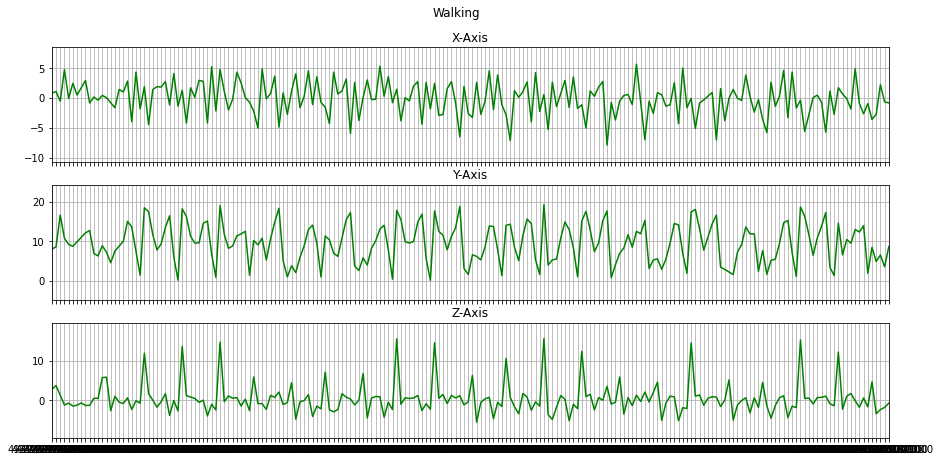

(200, 6)


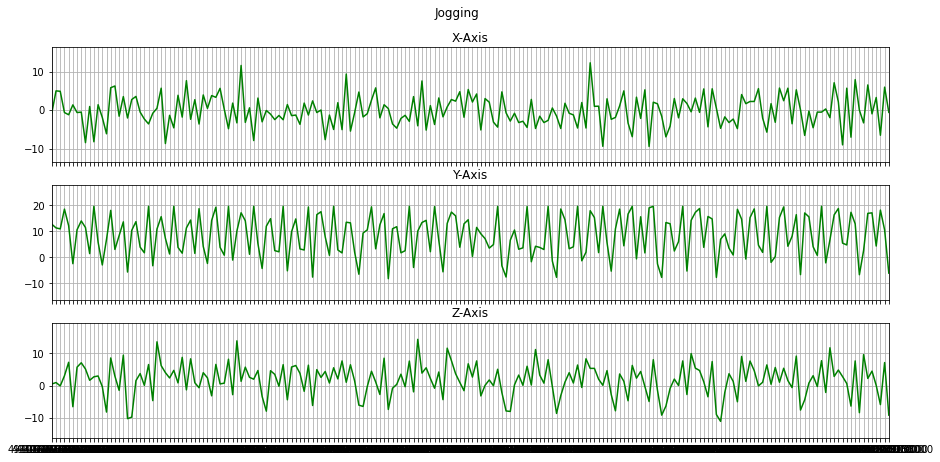

(200, 6)


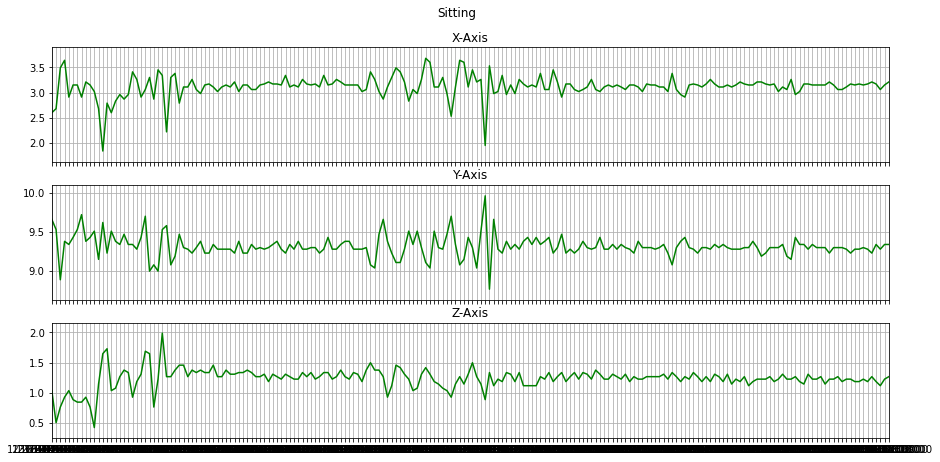

(200, 6)


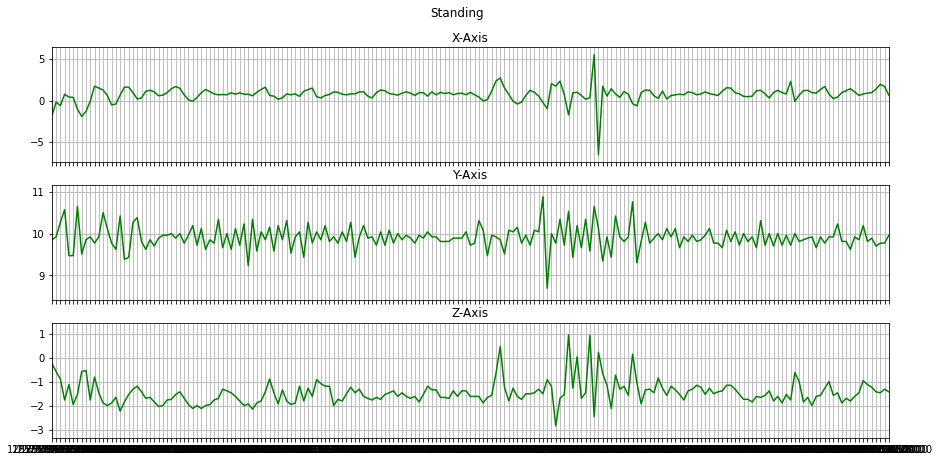

(200, 6)


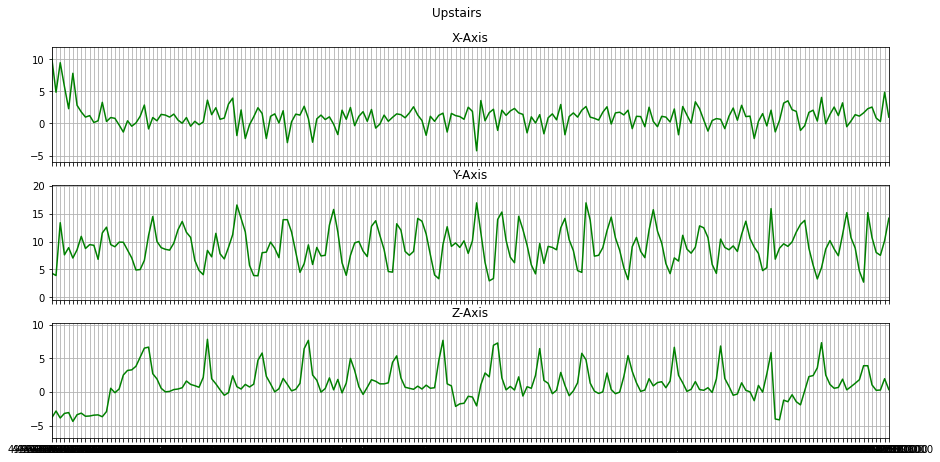

(200, 6)


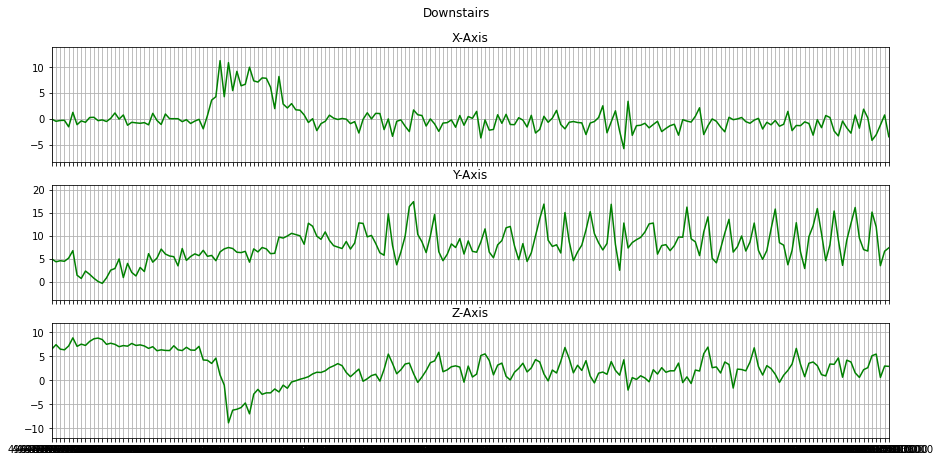

In [26]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['time'], data['x'], 'X-Axis')
    plot_axis(ax1, data['time'], data['y'], 'Y-Axis')
    plot_axis(ax2, data['time'], data['z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()
    

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
#     ax.axis_set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)
    

for activity in activities:
    data_for_plot = data[data['activity'] == activity][:Fs*10]
    print(data_for_plot.shape)
    plot_activity(activity, data_for_plot)

In [27]:
df = data.drop(['user', 'time'], axis=1)
df.head(5)

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


In [28]:
df['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [30]:
Walking  =  df[df['activity'] == 'Walking'].head(3555).copy()
Jogging  =  df[df['activity'] == 'Jogging'].head(3555).copy()
Upstairs  =  df[df['activity'] == 'Upstairs'].head(3555).copy()
Downstairs  =  df[df['activity'] == 'Downstairs'].head(3555).copy()
Sitting  =  df[df['activity'] == 'Sitting'].head(3555).copy()
Standing  =  df[df['activity'] == 'Standing'].head(3555).copy()

In [31]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Walking, Jogging, Upstairs, Downstairs, Sitting, Standing])

In [32]:
print(balanced_data.shape)

(21330, 4)


In [33]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity'])
print(balanced_data.shape)
balanced_data.head()

(21330, 5)


,activity,x,y,z,label
597,Walking,0.844462,8.008764,2.792171,5
598,Walking,1.116869,8.621680,3.786457,5
599,Walking,-0.503953,16.657684,1.307553,5
600,Walking,4.794363,10.760075,-1.184970,5
601,Walking,-0.040861,9.234595,-0.694638,5


In [34]:
label.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

## Standardized data

In [35]:
X = balanced_data[['x', 'y', 'z']]
y = balanced_data['label']

In [37]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data=X, columns=['x', 'y', 'z'])
scaled_X['label'] = y.values


scaled_X.head()

,x,y,z,label
0,0.000503,-0.099190,0.337933,5
1,0.073590,0.020386,0.633446,5
2,-0.361275,1.588160,-0.103312,5
3,1.060258,0.437573,-0.844119,5
4,-0.237028,0.139962,-0.698386,5


### Frame preparation

In [38]:
import scipy.stats as stats

In [40]:
Fs = 20
frame_size = Fs * 4 
hop_size = Fs * 2

In [57]:
def get_frames(df, frame_size, hop_size):
    N_FEATURES = 3
    frames = []
    labels = []
    
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]
        
        label = stats.mode(df['label'][i: i + frame_size])[0][0]  ## stats.mode返回出现次数最多的项以及出现的次数
        frames.append([x, y, z])
        labels.append(label)
#     print(len(labels))    
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)
    
    return frames, labels

In [58]:
X.shape

(21330, 3)

In [59]:
X, y = get_frames(scaled_X, frame_size, hop_size)
print(X.shape, y.shape)


532
(532, 80, 3) (532,)


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [63]:
X_train.shape, X_test.shape

((425, 80, 3), (107, 80, 3))

In [64]:
X_train = X_train.reshape(425, 80, 3, 1)
X_test = X_test.reshape(107, 80, 3, 1)

## BULD 2D CNN MODEL

In [108]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(2, 2), activation='relu', input_shape=X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
# model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))


In [109]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 79, 2, 16)         80        
_________________________________________________________________
dropout_12 (Dropout)         (None, 79, 2, 16)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 78, 1, 32)         2080      
_________________________________________________________________
dropout_13 (Dropout)         (None, 78, 1, 32)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2496)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                159808    
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)               

In [110]:
model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [111]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Train on 425 samples, validate on 107 samples
Epoch 1/10
425/425 [==============================] - 0s 758us/sample - loss: 1.5931 - accuracy: 0.3553 - val_loss: 1.2774 - val_accuracy: 0.4860
Epoch 2/10
425/425 [==============================] - 0s 143us/sample - loss: 1.2280 - accuracy: 0.5600 - val_loss: 0.9188 - val_accuracy: 0.7757
Epoch 3/10
425/425 [==============================] - 0s 143us/sample - loss: 0.8799 - accuracy: 0.6941 - val_loss: 0.5835 - val_accuracy: 0.8037
Epoch 4/10
425/425 [==============================] - 0s 134us/sample - loss: 0.6277 - accuracy: 0.7859 - val_loss: 0.4585 - val_accuracy: 0.8131
Epoch 5/10
425/425 [==============================] - 0s 134us/sample - loss: 0.5543 - accuracy: 0.8024 - val_loss: 0.3859 - val_accuracy: 0.8505
Epoch 6/10
425/425 [==============================] - 0s 134us/sample - loss: 0.4084 - accuracy: 0.8588 - val_loss: 0.3567 - val_accuracy: 0.8318
Epoch 7/10
425/425 [==============================] - 0s 134us/sample - loss: 

In [112]:
def plot_learningCureve(history):
    epoch_range = range(1,11)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

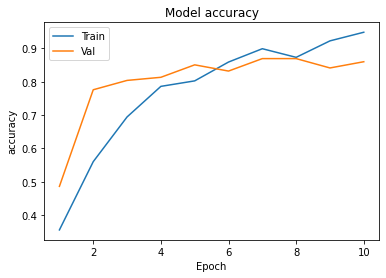

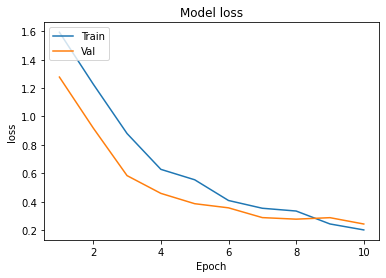

In [113]:
plot_learningCureve(history)

## Confusion matrix

In [74]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [79]:
y_test

array([4, 2, 2, 1, 1, 1, 5, 4, 2, 4, 3, 2, 0, 2, 3, 2, 1, 1, 2, 5, 4, 5,
       5, 1, 1, 0, 5, 3, 3, 1, 0, 0, 4, 5, 2, 5, 2, 1, 1, 2, 2, 1, 4, 0,
       4, 0, 2, 3, 3, 3, 2, 4, 5, 0, 4, 3, 3, 4, 3, 0, 0, 1, 1, 0, 1, 2,
       1, 0, 3, 3, 3, 5, 4, 4, 4, 4, 5, 2, 5, 5, 4, 3, 3, 4, 4, 3, 0, 3,
       5, 5, 5, 0, 2, 1, 4, 0, 3, 0, 0, 1, 2, 5, 0, 5, 1, 0, 2])

In [84]:
mat = confusion_matrix(y_true=y_test, y_pred=model.predict_classes(X_test))

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x24724a42710>)

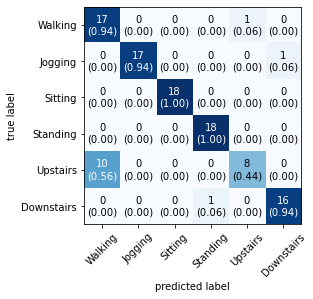

In [89]:
plot_confusion_matrix(mat, class_names=activities, show_normed=True)